# Predicting Car Prices using K-Neighbors #

In this project we will be predicting car values using the KNeighborsRegressor class.

The dataset details:
- symboling: -3, -2, -1, 0, 1, 2, 3.
- normalized-losses: continuous from 65 to 256.
- make: this includes car brands such as alfa-romero, audi, bmw, chevrolet,
- dodge, honda etc.
- fuel-type: diesel, gas.
- aspiration: std, turbo.
- num-of-doors: four, two.
- body-style: hardtop, wagon, sedan, hatchback, convertible.
- drive-wheels: 4wd, fwd, rwd.
- engine-location: front, rear.
- wheel-base: continuous from 86.6 120.9.
- length: continuous from 141.1 to 208.1.
- width: continuous from 60.3 to 72.3.
- height: continuous from 47.8 to 59.8.
- curb-weight: continuous from 1488 to 4066.
- engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
- num-of-cylinders: eight, five, four, six, three, twelve, two.
- engine-size: continuous from 61 to 326.
- fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
- bore: continuous from 2.54 to 3.94.
- stroke: continuous from 2.07 to 4.17.
- compression-ratio: continuous from 7 to 23.
- horsepower: continuous from 48 to 288.
- peak-rpm: continuous from 4150 to 6600.
- city-mpg: continuous from 13 to 49.
- highway-mpg: continuous from 16 to 54.
- price: continuous from 5118 to 45400.

Our goal is to apply learned machine learning methodolgies and perform a test/test validation and a grid search to determine the best model and the optimal k-value to determine car prices. The dataset for this project is available [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [58]:
import pandas as pd
cols = ['symboling','normalized-losses','make','fuel-type', 'aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars = pd.read_csv('imports-85.data',names = cols)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning #

In [83]:
import numpy as np
cars.replace(to_replace='?', value = np.nan, inplace=True)
#cars.info()
cars = cars.replace('?',np.nan)
num_cols = ['symboling','normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','compression-ratio','horsepower','city-mpg','highway-mpg']
cars[num_cols] = cars[num_cols].astype(float)
cars['price'] = cars['price'].astype(float)

#fill missing values with column mean values
cars.fillna(cars.mean(), inplace = True)

print(cars.head())


   symboling  normalized-losses         make fuel-type aspiration  \
0        3.0              122.0  alfa-romero       gas        std   
1        3.0              122.0  alfa-romero       gas        std   
2        1.0              122.0  alfa-romero       gas        std   
3        2.0              164.0         audi       gas        std   
4        2.0              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base   ...     \
0          two  convertible          rwd           front        88.6   ...      
1          two  convertible          rwd           front        88.6   ...      
2          two    hatchback          rwd           front        94.5   ...      
3         four        sedan          fwd           front        99.8   ...      
4         four        sedan          4wd           front        99.4   ...      

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0        130.0         m

In [103]:
#normalizing numerical columns- 0-1 normalization

normalized_cars = (cars[num_cols] - cars[num_cols].min())/ (cars[num_cols].max() - cars[num_cols].min())

In [85]:
normalized_cars['price'] = cars['price']

# Univariate Model #

7     4236.412909
11    4475.468747
6     4542.595770
9     4946.351330
10    5024.992477
4     5174.104603
3     5555.639867
2     5874.202963
8     7388.631597
0     8019.454784
1     8057.732689
5     8436.882509
dtype: float64


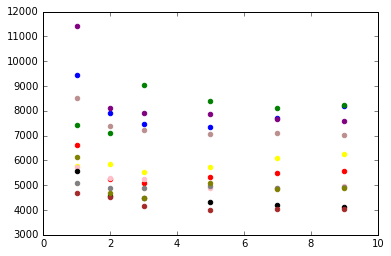

In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(training_col, target_col,df,k=5):
    knn = KNeighborsRegressor(k)
    np.random.seed(1)
    shuffled = np.random.permutation(df.index)
    normalized_cars = df.reindex(shuffled)
    train_cars = normalized_cars.iloc[0:96].copy()
    test_cars = normalized_cars.iloc[96:].copy()
    knn.fit(train_cars[training_col], train_cars[target_col])
    predictions = knn.predict(test_cars[training_col])
    mses = mean_squared_error(test_cars[target_col],predictions)
    rmse = np.sqrt(mses)
    return rmse

rmse_all = pd.DataFrame()

#rmse_all['features']= num_cols
for k in [1,2,3,5,7,9]:
    rmses = []
    for col in num_cols:
        col = [col]
        rmses.append(knn_train_test(col,'price',normalized_cars,k))
    rmse_all[k] = rmses

for i,c in zip(range(0,len(rmse_all)), ['blue','green','yellow','red','pink','purple','black','brown','rosybrown','gray','olive']):
    x = rmse_all.columns
    y = rmse_all.loc[[i]]
    plt.scatter(x,y, color = c)
n_best_features = rmse_all.mean(axis=1).sort_values(ascending=True)
print(n_best_features)

## Multivariate Model ##

In this model we use combinations of best features of the previous model with the default k value (5)

In [99]:
rmse_2= knn_train_test(['engine-size','horsepower'],'price', normalized_cars)
rmse_3 = knn_train_test(['engine-size','horsepower','highway-mpg'],'price',normalized_cars)
rmse_4 = knn_train_test(['engine-size','horsepower','highway-mpg','curb-weight'],'price',normalized_cars)
rmse_5= knn_train_test(['engine-size','horsepower','highway-mpg','curb-weight','width'],'price',normalized_cars)

print('2 features:',rmse_2,'3 features:', rmse_3,'4 features:', rmse_4,'5 features:', rmse_5)



2 features: 3456.9634127575023 3 features: 3149.6716294788935 4 features: 3529.122478338876 5 features: 3758.677255329484


In [100]:
from copy import copy
h_p = [x for x in range(1,26)]
rmse_hyp = {}
r ={}
best_models = ['engine-size','horsepower','highway-mpg','curb-weight','width']

for j in range(2,6,1):   
    for p in h_p:
        r[p] = knn_train_test(best_models[:j],'price',normalized_cars,p)
    #use copy so old values don't change in the dictionary
    rmse_hyp['{} best models'.format(j)] = copy(r)

#pretty print dictionary
import json
print(json.dumps(rmse_hyp, indent=2, default = str))

{
  "4 best models": {
    "1": 3435.216173879409,
    "2": 3199.247939799713,
    "3": 3463.889753627331,
    "4": 3804.643445494509,
    "5": 3529.122478338876,
    "6": 3658.744247948827,
    "7": 3778.7290843510273,
    "8": 3871.353158839808,
    "9": 4045.7083668325063,
    "10": 4057.0701085935148,
    "11": 4142.910522864327,
    "12": 4051.5370767344725,
    "13": 4077.2302720043476,
    "14": 4151.124658482259,
    "15": 4278.778579393406,
    "16": 4381.443979955056,
    "17": 4467.660602117891,
    "18": 4506.722551080046,
    "19": 4592.454465837201,
    "20": 4663.550014229498,
    "21": 4726.051839653809,
    "22": 4753.386889130332,
    "23": 4773.21169896558,
    "24": 4805.985940682427,
    "25": 4816.842485630269
  },
  "2 best models": {
    "1": 3568.9536738106126,
    "2": 3241.2931296733077,
    "3": 3272.8677912261583,
    "4": 3351.9764371746883,
    "5": 3456.9634127575023,
    "6": 3794.534129421609,
    "7": 3962.7194818081266,
    "8": 4056.1664086122228,
 

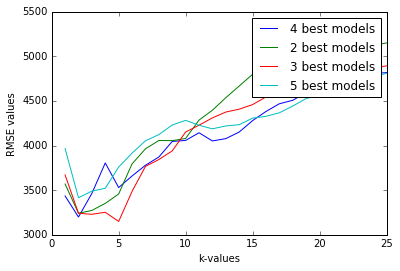

In [101]:
for k,v in rmse_hyp.items():
    x = list(v.keys())
    y= list(v.values())
    plt.plot(x,y, label='{}'.format(k))
plt.xlabel('k-values')
plt.ylabel('RMSE values')
plt.legend()

At k values 1 to 2, The RMSE values seem to have dropped before rising higher at higher k values. For the multivariate model, 3 best features with a k value of 5 seems to give us the best results in terms of errors in prediction.